<a href="https://colab.research.google.com/github/Rohanpeerla/Module-5-Project/blob/master/Module_5_Project_FMML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

img_array = [[1, 2], [3, 4]]
is_finger = True
coordinates = (10, 20)
index = 42
point_data = PointData(img_array, is_finger, coordinates, index)
print(point_data.getPointGrid())
print(point_data.getBoolean())
print(point_data.getCoors())
print(point_data.data())


NameError: name 'PointData' is not defined

In [ ]:
def makePointsDataset(self, filter_size=None):
    if filter_size is None:
        raise ValueError("Filter size must be specified.")
    F = filter_size // 2  # Calculate half of the filter size
    collection = []
    rows, cols = self.bitImage.shape
    for r in range(F, rows - F):
        for c in range(F, cols - F):
            image_patch = self.bitImage[r - F : r + F + 1, c - F : c + F + 1]
            is_finger_point = (r, c) in self.fingerPoints
            collection.append(PointDat(image_patch, is_finger_point, (r, c), self.idx))

    return np.array(collection, dtype=object)


NameError: name 'ImgDat' is not defined

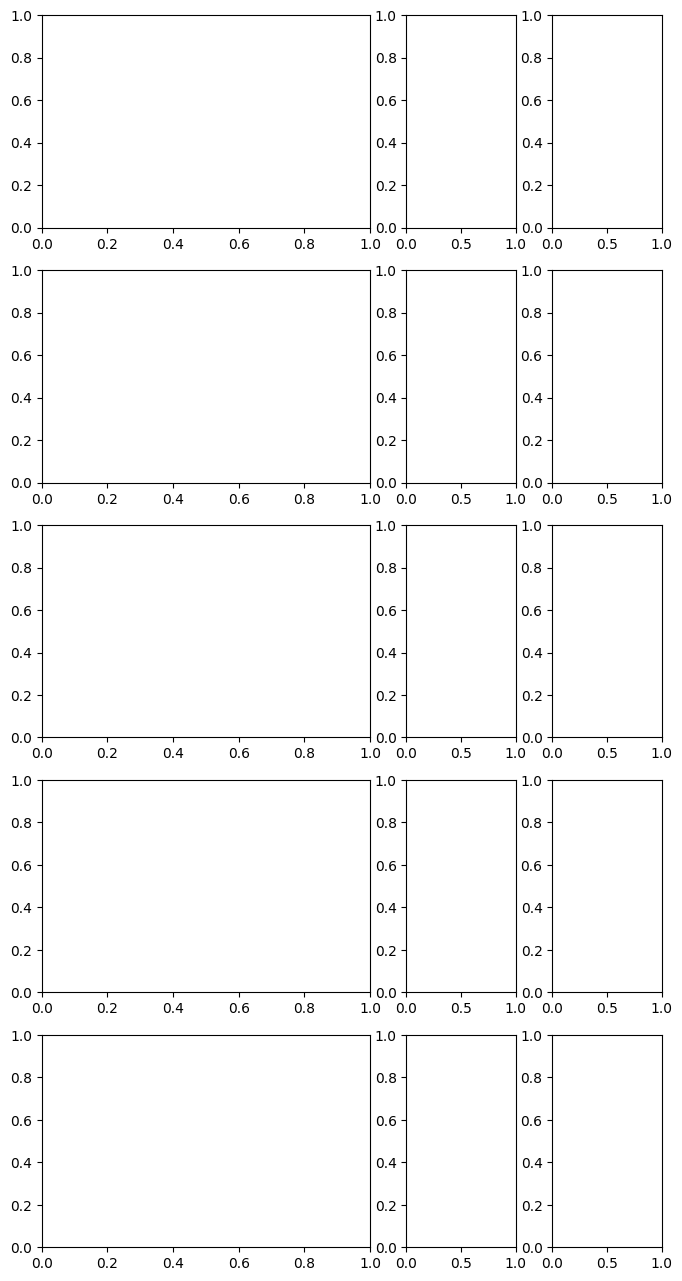

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

sampleIndices = [0, 10, 52, 30, 40]

fig, axs = plt.subplots(5, 3, figsize=(8, 16), gridspec_kw={'width_ratios': [3, 1, 1]})

for r, index in enumerate(sampleIndices):
    p = ImgDat(dat[index], index)

    axs[r, 0].imshow(p.showFullImage())
    axs[r, 0].set_title(f'Index {index} - Full Image')

    axs[r, 1].imshow(p.showImage())
    axs[r, 1].set_title('Cropped Image')

    axs[r, 2].imshow(p.showFingers())
    axs[r, 2].set_title('Fingers Highlighted')

for ax in axs.flat:
    ax.axis('off')

fig.set_dpi(100)
plt.tight_layout()
plt.show()


NameError: name 'posPoints' is not defined

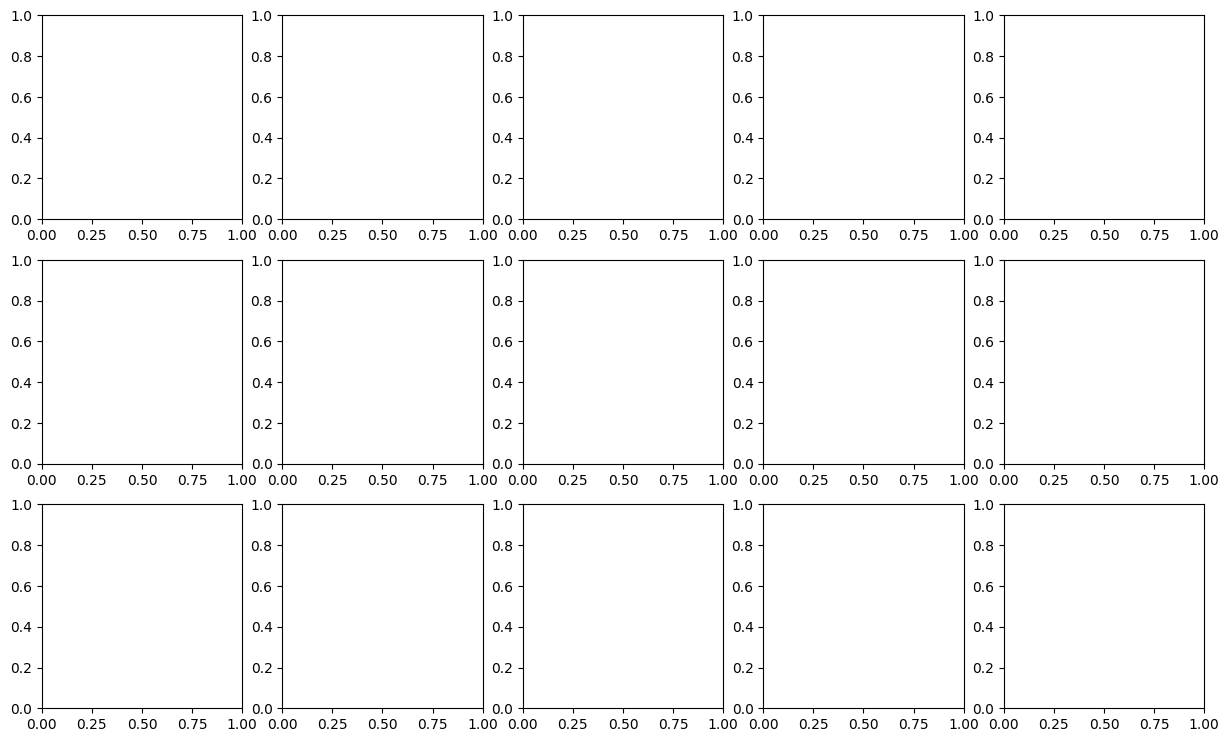

In [ ]:
np.random.seed(0)
fig, axs = plt.subplots(3, 5, figsize=(15, 9))

for ax_row in axs:
    for ax in ax_row:
        point = np.random.choice(posPoints)
        img_grid = point.getPointGrid()

        ax.imshow(img_grid)
        ax.title.set_text(str(point))
        filter_center = FILTER // 2
        ax.set_xticks([filter_center])
        ax.set_yticks([filter_center])
        ax.set_xticklabels([f'{point.getCoors()[1] - filter_center}'])
        ax.set_yticklabels([f'{point.getCoors()[0] - filter_center}'])
plt.show()
plt.show()


In [ ]:
def singleton(cls, *args, **kw):
    instances = {}
    def _singleton(*args, **kw):
        if cls not in instances:
            instances[cls] = cls(*args, **kw)
        return instances[cls]
    return _singleton
@singleton
class FingersFromPoints:
    def findAdjacent(self, coordinates, coordinate, cluster):
        distances = np.sqrt(np.sum((coordinates - coordinate) ** 2, axis=1))
        newCoordIndices = np.where(np.logical_and(distances < 1.3, distances > 0))[0]
        for newCoordIndex in newCoordIndices:
            if newCoordIndex not in cluster:
                cluster.append(newCoordIndex)
                self.findAdjacent(coordinates, coordinates[newCoordIndex, :], cluster)
    def findClusters(self, coordinates):
        allIndices = np.arange(len(coordinates))
        clusters = []
        while len(allIndices) > 0:
            cluster = [allIndices[0]]
            self.findAdjacent(coordinates, coordinates[allIndices[0], :], cluster)
            allIndices = np.setdiff1d(allIndices, np.array((cluster)))
            clusters.append(cluster)
        return clusters
    def findClusterCoors(self, coors):
        clusters = self.findClusters(coors)
        newClus = []
        for c in clusters:
            temp = []
            for idx in c:
                temp.append(coors[idx])
            newClus.append(temp)
        return newClus
    def countFingers(self, clusters, minFingerSize=15, fingerCutoff=0.5):
        sizes = [len(cluster) for cluster in clusters]
        if sizes:
            max_size = max(sizes)
            if max_size > minFingerSize:
                fingerCluster = np.argmax(sizes)
                numFingers = sum(sizes > fingerCutoff * max_size)
            else:
                numFingers = 0
        else:
            numFingers = 0
        return numFingers
    def predictNumFingers(self, coors):
        newCoors = np.array(coors)
        clusters = self.findClusters(newCoors)
        return self.countFingers(clusters)
fingers_predictor = FingersFromPoints()
coors_example = [(1, 2), (3, 4), (5, 6), (7, 8), (9, 10)]
predicted_fingers = fingers_predictor.predictNumFingers(coors_example)
print(predicted_fingers)


SyntaxError: 'return' outside function (<ipython-input-9-a4d9482c18e5>, line 1)

In [ ]:
predObj = FingersFromPoints()  # Corrected class name

imgObj = ImgDat(dat[52], 52)

assert imgObj.numFingers == predObj.predictNumFingers(imgObj.fingerPoints),

        imgObj.idx, predObj.predictNumFingers(imgObj.fingerPoints), imgObj.numFingers


SyntaxError: invalid syntax (<ipython-input-4-c18d8e2a22e5>, line 5)

NameError: name 'incor' is not defined

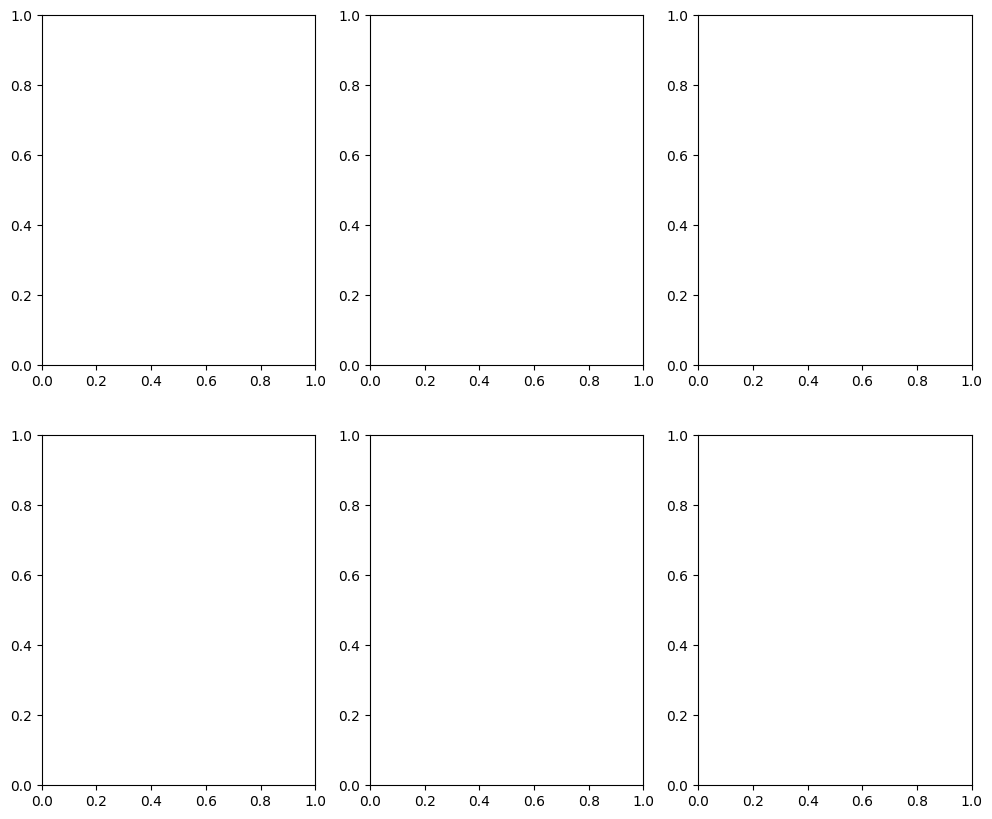

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
incorIndices = []
for idx, (ax, imObj) in enumerate(zip(axs, incor)):
    print("Incorrect for {}".format(imObj.idx))
    incorIndices.append(imObj.idx)
    ax[0].imshow(imObj.showImage())
    ax[0].set_title("Original Image")
    ax[1].imshow(imObj.showFingers())
    ax[1].set_title("Fingers Highlighted")
    img = imObj.showImage().copy()
    clusters = predObj.findClusterCoors(np.array(imObj.fingerPoints))
    COLS = ["green", "red", "blue", "yellow", "orange", "pink"]
    for idx2, c in enumerate(clusters):
        highlightPoints(img, c, COLS[idx2])
    ax[2].imshow(img)
    ax[2].set_title("Clusters Highlighted")
plt.show()


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_text
iris = load_iris()
X, y = iris.data, iris.target
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)
tree_rules = export_text(clf, feature_names=iris.feature_names)
print("Decision Tree Rules:\n", tree_rules)

Decision Tree Rules:
 |--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



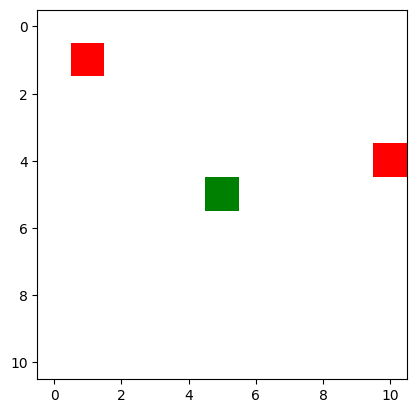

In [ ]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
blank = np.ones((11, 11))
img = Image.fromarray((blank * 255).astype(np.uint8))
img = img.convert(mode="RGB")
imDraw = ImageDraw.Draw(img)
imDraw.point((12 % 11, 12 // 11), fill="red")
imDraw.point((54 % 11, 54 // 11), fill="red")
imDraw.point((60 % 11, 60 // 11), fill="green")
plt.imshow(img)
plt.show()
